In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

There are 614 rows and 13 columns in dataset

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are three type of dtypes integer,float and object

In [7]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

As we can see high skewness in ApplicantIncome and CoapplicantIncome

In [8]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


As above observation we can see mean is higher in three column ApplicantIncome,CoapplicantIncome and LoanAmount


As there is huge difference in 75% and max in same three columns means there is outlier which will treat in further step

Lets find out if there is any missing value in dataset

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

As we can see there are missing values in 7 columns which we will trat in next column

In [10]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

In [11]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

In [12]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

In [13]:
df['LoanAmount']=df['LoanAmount'].fillna( df['LoanAmount'].mean())

In [14]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [15]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [16]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see the NAN value has been replace by mean and mode

Let use encoder to convert our categorical data into numerical

In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There is class imbalance which is not that much severe

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

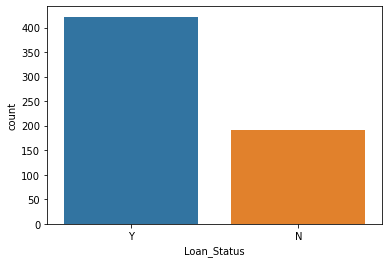

In [19]:
sns.countplot(df['Loan_Status'])

As we can see most of the people loans have been approved

<AxesSubplot:xlabel='Education', ylabel='count'>

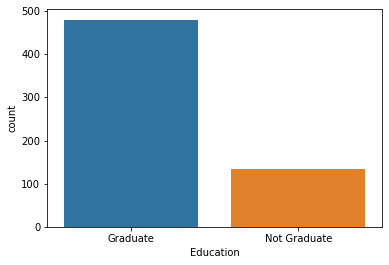

In [20]:
sns.countplot(df['Education'])

Around 80% of the applicants are Graduate.

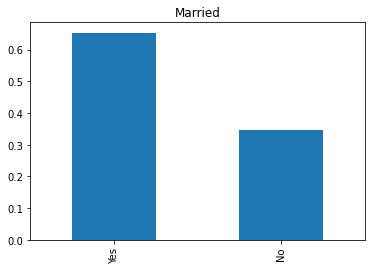

In [21]:
df['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

Around 65% of the applicants in the dataset are married.

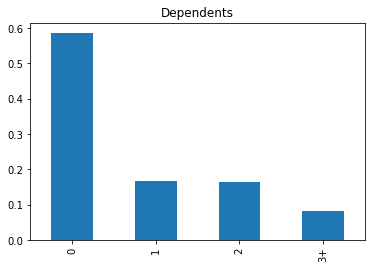

In [22]:
df['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()

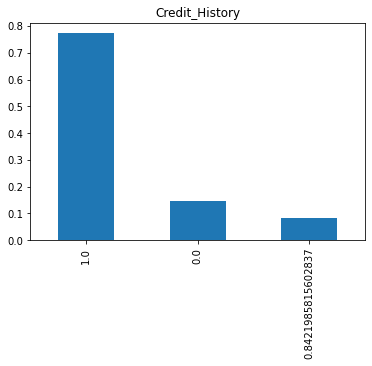

In [23]:
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It seems people with a credit history as 1 are more likely to get their loans approved.

In [24]:
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

As we can see there is high skewness in ApplicantIncome and CoapplicantIncome

In [25]:
#making the skewness less than or equal to 0.55 for better prediction and plotting normal distribution

In [26]:
skew=('ApplicantIncome','CoapplicantIncome',)

In [27]:
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [28]:
df.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.963600
dtype: float64

<AxesSubplot:>

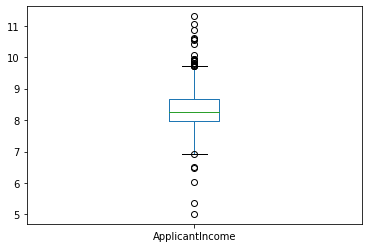

In [29]:
df['ApplicantIncome'].plot.box()

As there is outlier in ApplicantIncome we will remove in further step

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

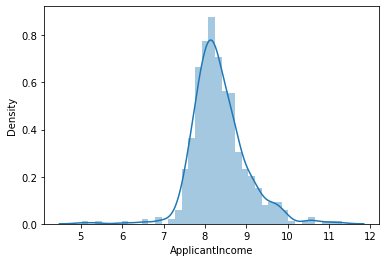

In [30]:
sns.distplot(df['ApplicantIncome'])

As now we can see after removing skewness in ApplicantIncome data has norminally distributed

Data is normally distributed

Lets convert our categorical data into numerical by using Encoders

In [31]:
from sklearn.preprocessing import OrdinalEncoder

In [32]:
ode=OrdinalEncoder()

In [33]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=ode.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,141.000000,360.0,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,7.972811,0.000000,71.000000,360.0,1.0,0.0,1.0
610,610.0,1.0,1.0,3.0,0.0,0.0,8.320448,0.000000,40.000000,180.0,1.0,0.0,1.0
611,611.0,1.0,1.0,1.0,0.0,0.0,8.996280,5.484797,253.000000,360.0,1.0,2.0,1.0
612,612.0,1.0,1.0,2.0,0.0,0.0,8.933796,0.000000,187.000000,360.0,1.0,2.0,1.0


We have converted our categorical data in float type 

Now lets convert our target column in integer type for better accuracy

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
df['Loan_Status']=le.fit_transform(df['Loan_Status'])

In [37]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,128.000000,360.0,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,66.000000,360.0,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,120.000000,360.0,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,7.972811,0.000000,71.000000,360.0,1.0,0.0,1
610,610.0,1.0,1.0,3.0,0.0,0.0,8.320448,0.000000,40.000000,180.0,1.0,0.0,1
611,611.0,1.0,1.0,1.0,0.0,0.0,8.996280,5.484797,253.000000,360.0,1.0,2.0,1
612,612.0,1.0,1.0,2.0,0.0,0.0,8.933796,0.000000,187.000000,360.0,1.0,2.0,1


Lets find the correlation in the dataset

In [38]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.012910,-0.017856,0.035684,-0.028945,-0.032429,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.084501,0.220579,0.107930,-0.073567,0.012819,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.021444,0.317095,0.147141,-0.100863,0.005852,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.115839,-0.000732,0.163106,-0.101054,-0.037392,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.181735,0.043127,-0.166998,-0.077242,-0.077936,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.189847,-0.092308,0.115260,-0.033943,-0.002260,-0.030860,-0.003700
ApplicantIncome,0.012910,0.084501,0.021444,0.115839,-0.181735,0.189847,1.000000,-0.368258,0.551656,-0.030741,0.019183,-0.029501,0.010959
CoapplicantIncome,-0.017856,0.220579,0.317095,-0.000732,0.043127,-0.092308,-0.368258,1.000000,0.047522,0.013613,0.002384,-0.055183,0.060593
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.551656,0.047522,1.000000,0.038801,-0.007738,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.030741,0.013613,0.038801,1.000000,0.001395,-0.077620,-0.020974


Let visualize it which will be easy to understand

<AxesSubplot:>

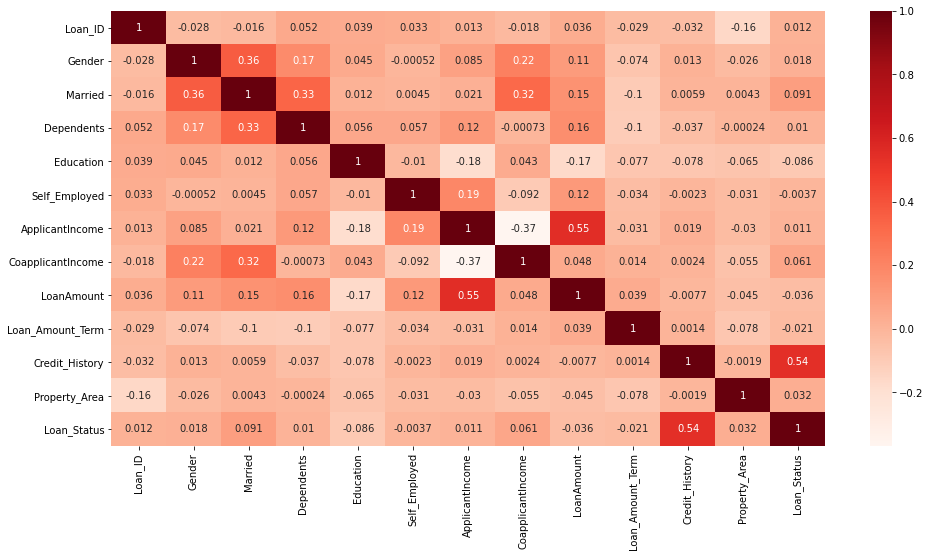

In [39]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

ApplicantIncome have correlated with Loan_amount and credit history with Loan_status

Lets find the outlier in dataset by using boxplots

Loan_ID                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
Gender                AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Married                AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Dependents            AxesSubplot(0.606034,0.71587;0.133621x0.16413)
Education             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Self_Employed           AxesSubplot(0.125,0.518913;0.133621x0.16413)
ApplicantIncome      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
CoapplicantIncome     AxesSubplot(0.44569,0.518913;0.133621x0.16413)
LoanAmount           AxesSubplot(0.606034,0.518913;0.133621x0.16413)
Loan_Amount_Term     AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Credit_History          AxesSubplot(0.125,0.321957;0.133621x0.16413)
Property_Area        AxesSubplot(0.285345,0.321957;0.133621x0.16413)
Loan_Status           AxesSubplot(0.44569,0.321957;0.133621x0.16413)
dtype: object

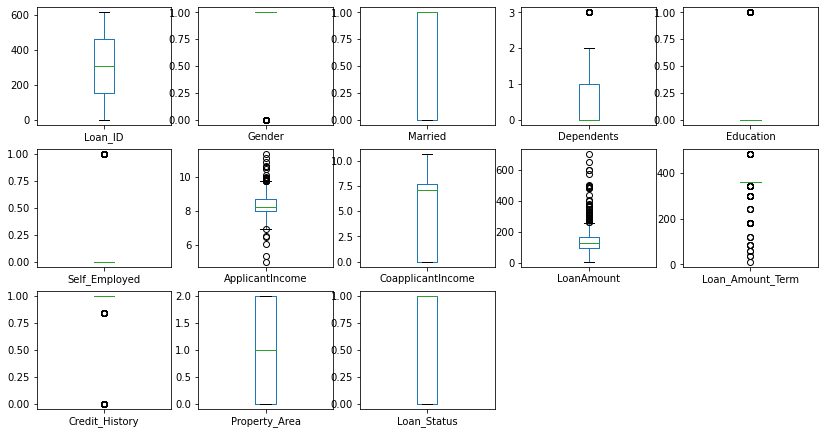

In [40]:
df.plot(kind='box',subplots=True,layout=(4,5),figsize=(14,10))

As we can see there are black dots in some column means there is outlier so we should remove it

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.45164045, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.45164045, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.45164045, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.41044061, 0.04760721,
        1.48253724]])

In [42]:
threshold=3
print(np.where(z>3))

(array([ 14,  68,  94, 130, 133, 155, 155, 171, 171, 177, 183, 185, 216,
       242, 262, 278, 308, 313, 333, 333, 369, 409, 432, 443, 468, 487,
       495, 497, 506, 523, 525, 546, 561, 575, 585, 600, 604], dtype=int64), array([9, 9, 9, 8, 9, 6, 8, 6, 8, 8, 6, 6, 6, 9, 9, 8, 8, 9, 6, 8, 8, 6,
       8, 6, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 9, 6, 8], dtype=int64))


In [43]:
df_new=df[(z<3).all(axis=1)]

In [44]:
df_new

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,8.674197,0.000000,146.412162,360.0,1.0,2.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,8.430327,7.319202,128.000000,360.0,1.0,0.0,0
2,2.0,1.0,1.0,0.0,0.0,1.0,8.006701,0.000000,66.000000,360.0,1.0,2.0,1
3,3.0,1.0,1.0,0.0,1.0,0.0,7.857094,7.765993,120.000000,360.0,1.0,2.0,1
4,4.0,1.0,0.0,0.0,0.0,0.0,8.699681,0.000000,141.000000,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609.0,0.0,0.0,0.0,0.0,0.0,7.972811,0.000000,71.000000,360.0,1.0,0.0,1
610,610.0,1.0,1.0,3.0,0.0,0.0,8.320448,0.000000,40.000000,180.0,1.0,0.0,1
611,611.0,1.0,1.0,1.0,0.0,0.0,8.996280,5.484797,253.000000,360.0,1.0,2.0,1
612,612.0,1.0,1.0,2.0,0.0,0.0,8.933796,0.000000,187.000000,360.0,1.0,2.0,1


In [45]:
df.shape

(614, 13)

In [46]:
df_new.shape

(580, 13)

After removing outlier we have 580 rows 13 columns

Lets train train and test our features and target column

In [47]:
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
RFC.score(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.853448275862069
[[18 14]
 [ 3 81]]
              precision    recall  f1-score   support

           0       0.86      0.56      0.68        32
           1       0.85      0.96      0.91        84

    accuracy                           0.85       116
   macro avg       0.85      0.76      0.79       116
weighted avg       0.85      0.85      0.84       116



In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7413793103448276
[[17 15]
 [15 69]]
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        32
           1       0.82      0.82      0.82        84

    accuracy                           0.74       116
   macro avg       0.68      0.68      0.68       116
weighted avg       0.74      0.74      0.74       116



In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lg=LogisticRegression()

In [56]:
lg.fit(x_train,y_train)

LogisticRegression()

In [57]:
pred=lg.predict(x_test)
print(pred)

[1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0
 0 1 1 1 1]


In [58]:
print('accuracy_score:',accuracy_score(y_test,pred))

accuracy_score: 0.8620689655172413


In [59]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17 15]
 [ 1 83]]
              precision    recall  f1-score   support

           0       0.94      0.53      0.68        32
           1       0.85      0.99      0.91        84

    accuracy                           0.86       116
   macro avg       0.90      0.76      0.80       116
weighted avg       0.87      0.86      0.85       116



In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.7689655172413793


In [62]:
print(cross_val_score(dtc,x,y,cv=5).mean())

0.6396551724137931


In [63]:
print(cross_val_score(lg,x,y,cv=5).mean())

0.8120689655172413


After cross validation our best model is Logistic Regression

# Hyper parameter tuning

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
parameters=[{'penalty':['l1','l2','elasticnet','none'],'C':np.logspace(-4,4,28),
            'max_iter':[100,1000,2500]}]

In [66]:
GCV_lg=GridSearchCV(LogisticRegression(),parameters,cv=5)
GCV_lg.fit(x_train,y_train)
GCV_lg.best_params_

{'C': 0.7109709432312431, 'max_iter': 1000, 'penalty': 'l2'}

In [67]:
lg_mod=LogisticRegression(C=71,max_iter=1000,penalty='l2')
lg_mod.fit(x_train,y_train)
pred=lg_mod.predict(x_test)
(accuracy_score(y_test,pred))

0.8706896551724138

After Hyper parameter tuning we got 87%

# AUC ROC CURVE

In [68]:
from sklearn.metrics import plot_roc_curve

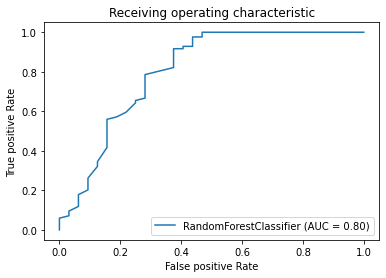

In [69]:
plot_roc_curve(RFC,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

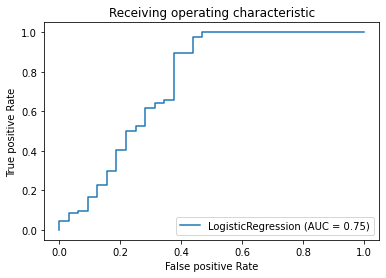

In [70]:
plot_roc_curve(lg,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

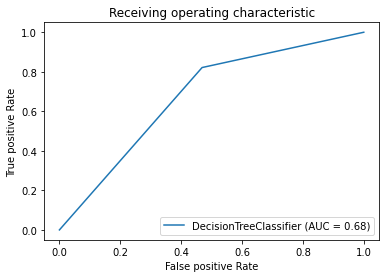

In [71]:
plot_roc_curve(dtc,x_test,y_test)
plt.title('Receiving operating characteristic')
plt.xlabel('False positive Rate')
plt.ylabel('True positive Rate')
plt.show()

# MODEL SAVING

In [72]:
import pickle

In [73]:
filename='loan_prediction.csv.pkl'
pickle.dump(lg,open(filename,'wb'))

In [74]:
import joblib

In [75]:
joblib.dump(lg,'loan_prediction.csv2.pkl')

['loan_prediction.csv2.pkl']

# Observations

* There were null value in the dataset which was treated by mean and mode

* Use label encoder and ordinal encoder for converting our categorical data into numerical

* Mean were higher in three column than median  

* Use log1p to remove skewness from CoapplicantIncome and ApplicantIncome

 * Remove outlier using zscore 

* ApplicantIncome is correlated each other with Loan_amount, credit history and Loan_status

* Those who have married also have the higher chance for loan approval

* Use three model Random forest,Decision tree and logistic regression in which Logistic regression was best